In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv', index_col='id')
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19275 entries, TRAIN_00000 to TRAIN_19274
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temperature     19275 non-null  float64
 1   pressure        19275 non-null  float64
 2   humidity        19275 non-null  float64
 3   wind_speed      19275 non-null  float64
 4   wind_direction  19275 non-null  float64
 5   precipitation   19275 non-null  float64
 6   snowing         19275 non-null  bool   
 7   cloudiness      19275 non-null  float64
 8   target          19275 non-null  float64
dtypes: bool(1), float64(8)
memory usage: 1.3+ MB


In [3]:
test = pd.read_csv('test.csv', index_col='id')
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19275 entries, TEST_00000 to TEST_19274
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temperature     19275 non-null  float64
 1   pressure        19275 non-null  float64
 2   humidity        19275 non-null  float64
 3   wind_speed      19275 non-null  float64
 4   wind_direction  19275 non-null  float64
 5   precipitation   19275 non-null  float64
 6   snowing         19275 non-null  bool   
 7   cloudiness      19275 non-null  float64
dtypes: bool(1), float64(7)
memory usage: 1.2+ MB


In [16]:
train['snowing']=train['snowing'].apply(lambda x : 0 if x==False else 1)

In [17]:
train.describe() #scaling

,temperature,pressure,humidity,wind_speed,wind_direction,precipitation,snowing,cloudiness,target
count,19275.000000,19275.000000,19275.000000,19275.000000,19275.000000,19275.000000,19275.000000,19275.000000,19275.000000
mean,17.288476,1059.825712,68.948763,2.476970,166.578179,0.076572,0.006485,25.749748,5.477028
std,7.192604,2544.132430,14.856929,1.359942,57.313099,0.193110,0.080271,17.628612,3.217581
min,-0.208137,812.600000,22.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.712000,1012.600000,57.800000,1.400000,127.000000,0.000000,0.000000,12.000000,2.956000
50%,16.530000,1016.800000,70.800000,2.200000,166.600000,0.000000,0.000000,23.000000,4.837000
75%,22.559000,1021.000000,80.800000,3.200000,208.000000,0.060000,0.000000,37.000000,7.436500
max,37.058000,201373.000000,100.000000,29.800000,338.000000,3.180000,1.000000,93.600000,17.344000


In [18]:
train.head(2)

,temperature,pressure,humidity,wind_speed,wind_direction,precipitation,snowing,cloudiness,target
id,,,,,,,,,
TRAIN_00000,27.8816,1013.6,46.8,2.4,232.4,0.0,0,0.0,1.180
TRAIN_00001,5.7540,1026.6,76.6,3.6,172.0,0.0,0,8.8,8.581


In [15]:
train['target'].kurt()

-0.0024371722007221486

C:\Users\junel\AppData\Local\Temp\ipykernel_13684\1740748902.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['target'])


<AxesSubplot: xlabel='target', ylabel='Density'>

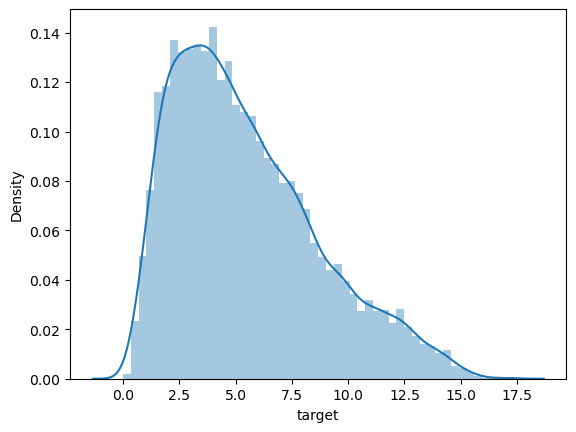

In [6]:
sns.distplot(train['target'])

C:\Users\junel\AppData\Local\Temp\ipykernel_13684\3293782763.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


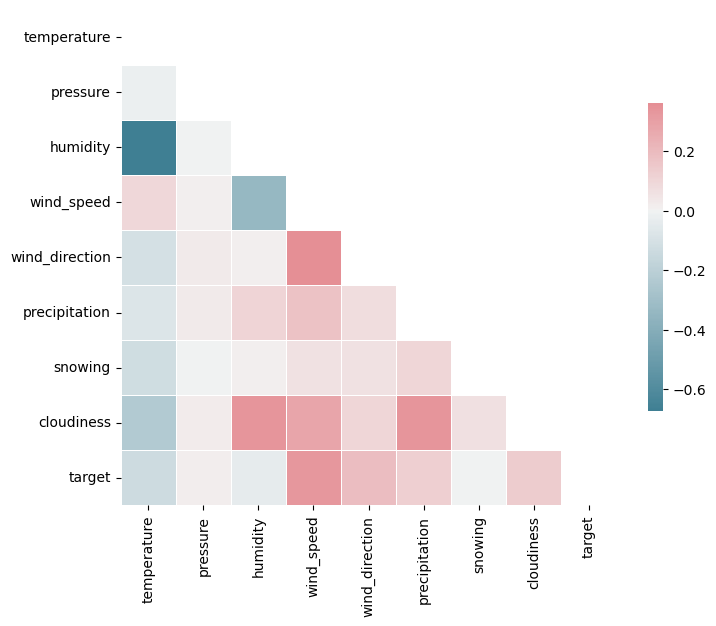

In [19]:
corr = train.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [20]:
train['snowing'].value_counts()

0    19150
1      125
Name: snowing, dtype: int64

<AxesSubplot: xlabel='snowing', ylabel='count'>

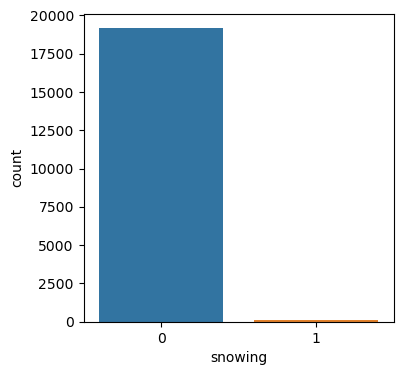

In [21]:
plt.figure(figsize=(4,4))
sns.countplot(data=train, x='snowing')

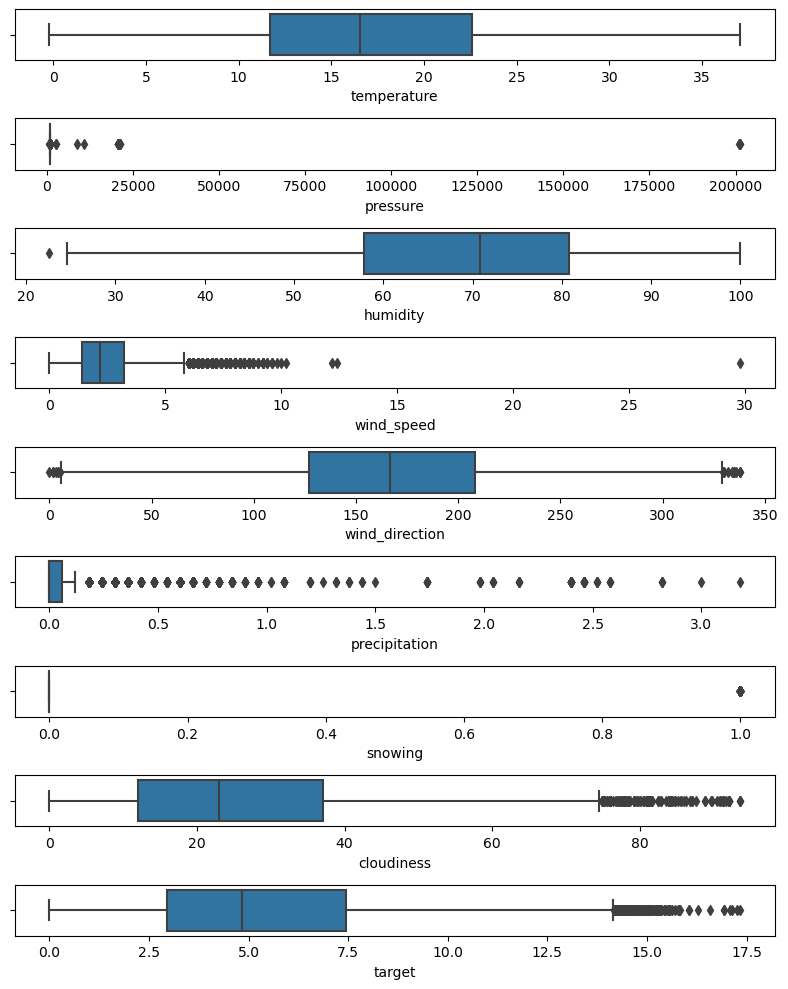

In [22]:
# boxplot으로 이상치 확인
fig, axes = plt.subplots(9,1, figsize = (8, 10))
row=0
for i in train.columns:
    sns.boxplot(data = train, x = i, ax = axes[row])
    row+=1
plt.tight_layout()
plt.show()

# Modeling

In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

In [24]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from lightgbm import LGBMRegressor

In [ ]:
from sklearn.neural_network import 

In [31]:
predictor = [
    RandomForestRegressor(n_estimators=2000),
    GradientBoostingRegressor(n_estimators=2000),
    XGBRegressor(n_estimators=2000),
    XGBRFRegressor(n_estimators=2000),
    LGBMRegressor(n_estimators=3000)

]

In [27]:
X=train.iloc[:,:-1]
y=train['target']

In [28]:
model_scores=[]
for model in predictor:
    scores=[]
    for i, (train_idx, val_idx) in enumerate(KFold(shuffle=False).split(X,y)):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        sc_X_train = sc.fit_transform(X_train)
        sc_X_val = sc.transform(X_val)

        model.fit(sc_X_train, y_train)
        score = mean_absolute_error(y_val, model.predict(sc_X_val))
        scores.append(score)
    print(type(model).__name__)
    print("MAE: ", sum(scores)/5, scores)
    model_scores.append(scores)

RandomForestRegressor
MAE:  1.996341519186783 [1.980102821630599, 1.9887060201442526, 1.977078542971585, 2.0225097899535913, 2.0133104212338866]
GradientBoostingRegressor
MAE:  2.179743655839414 [2.141305449785588, 2.180524398269321, 2.1845844103813215, 2.211042309255585, 2.181261711505253]
XGBRegressor
MAE:  2.140616554271127 [2.1108079671026667, 2.1279202327102387, 2.1304369741774414, 2.1893740411898195, 2.144543556175467]
XGBRFRegressor
MAE:  2.285168159864552 [2.259865272775296, 2.275872932914506, 2.283745462712487, 2.3253135587452296, 2.2810435721752405]
LGBMRegressor
MAE:  2.0478145786496773 [2.03269246887311, 2.054563995667485, 2.0369958302712483, 2.0596269005753656, 2.0551936978611796]


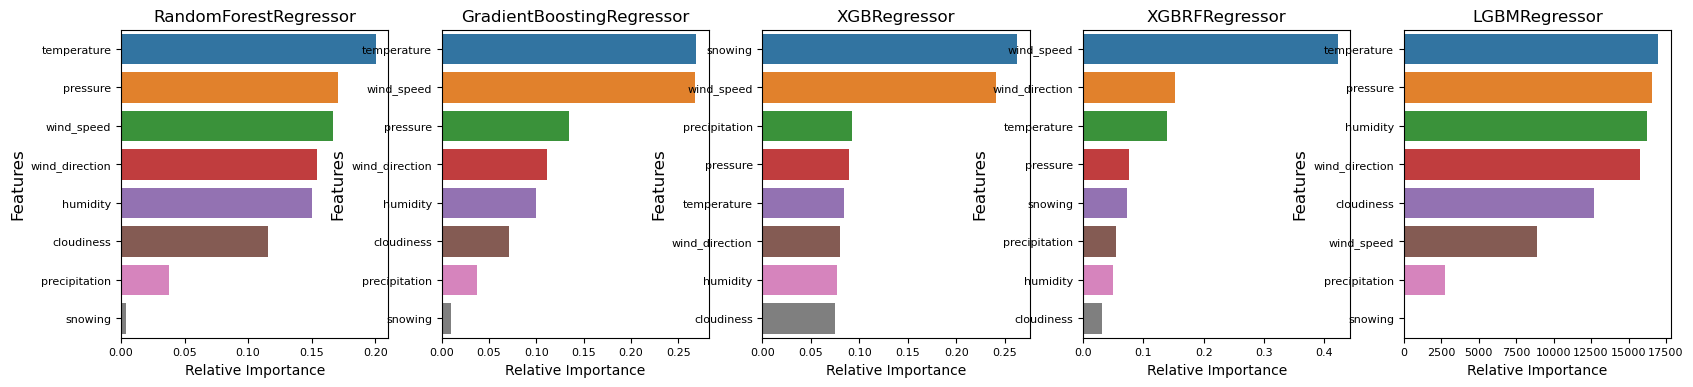

In [29]:
fig, axs = plt.subplots(1,5,figsize=(20,4))
col=0
for model in predictor: 
    feat_impt=model.feature_importances_
    graph_data=pd.DataFrame()

    graph_data['feature']=train.columns[:-1].values
    graph_data['importance']=feat_impt
    graph_data_top=graph_data.nlargest(30,'importance')

    g=sns.barplot(y='feature',x='importance',data=graph_data_top,orient='h', ax=axs[col])
    col+=1
    g.set_ylabel('Features',fontsize=12)
    g.set_xlabel('Relative Importance')
    g.set_title(type(model).__name__ )
    g.tick_params(labelsize=8)

In [30]:
sc_test = sc.transform(test)
pred = predictor[4].predict(sc_test)
submit=pd.read_csv('sample_submission.csv')
submit['target']=pred
submit.to_csv('LGBM.csv', index=False)